In [51]:
import librosa
import wave, os, glob
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import librosa.display

%matplotlib inline

import sklearn
from sklearn.preprocessing import minmax_scale, scale

# Import Files

In [2]:
x_clean, sr_clean = librosa.load('clean_dataset/p232_001.wav', sr=48000)
x_noisy, sr_noisy = librosa.load('noisy_dataset/p232_001.wav', sr=48000)

In [3]:
x_noise = np.subtract(x_noisy, x_clean)
x_compute = np.subtract(x_noisy, x_noise)

print(type(x_clean))
print(type(x_noisy))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Listening to the Audio File

In [7]:
import IPython.display as ipd

audio_1 = 'clean_dataset/p232_201.wav'
audio_2 = 'noisy_dataset/p232_201.wav'

ipd.Audio(audio_2)

# Waveplots

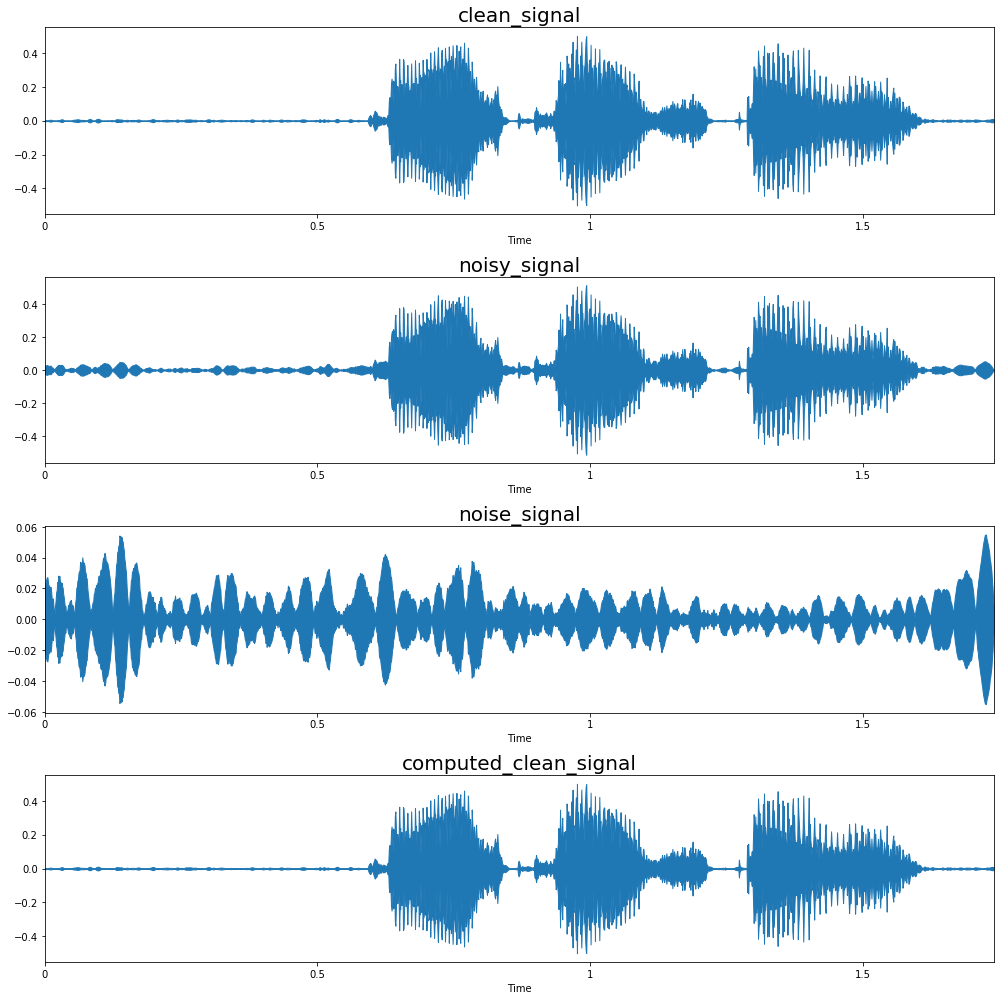

In [8]:
plt.figure(figsize=(14,14))

plt.subplot(4,1,1)
librosa.display.waveplot(x_clean, sr_clean)
plt.title('clean_signal', fontsize=20)


plt.subplot(4,1,2)
librosa.display.waveplot(x_noisy, sr_noisy)
plt.title('noisy_signal', fontsize=20)


plt.subplot(4,1,3)
librosa.display.waveplot(x_noise, sr_noisy)
plt.title('noise_signal', fontsize=20)

plt.subplot(4,1,4)
librosa.display.waveplot(x_compute, sr_noisy)
plt.title('computed_clean_signal', fontsize=20)

plt.tight_layout()

#plt.savefig('waveplots.png');

# Signal plots

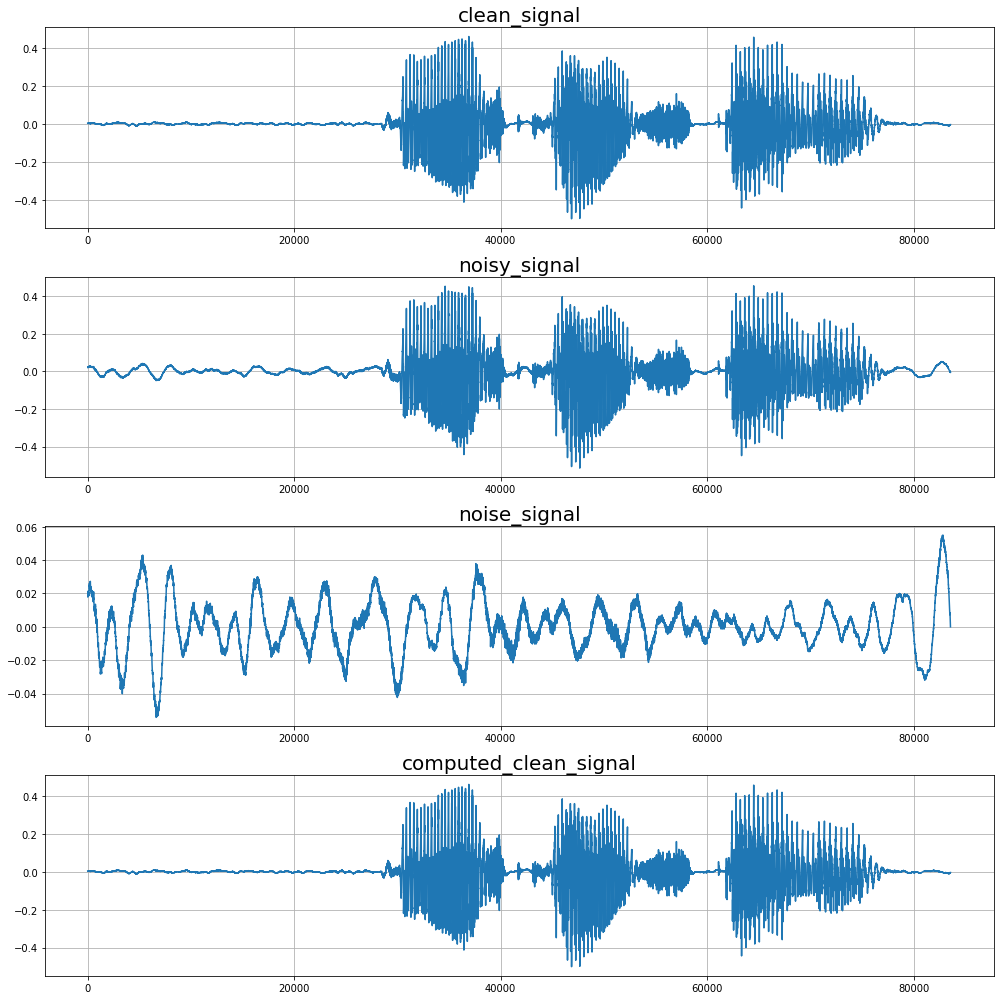

In [9]:
plt.figure(figsize=(14,14))

plt.subplot(4,1,1)
plt.plot(x_clean)
plt.grid()
plt.title('clean_signal', fontsize=20)

plt.subplot(4,1,2)
plt.plot(x_noisy)
plt.grid()
plt.title('noisy_signal', fontsize=20)

plt.subplot(4,1,3)
plt.plot(x_noise)
plt.grid()
plt.title('noise_signal', fontsize=20)

plt.subplot(4,1,4)
plt.plot(x_compute)
plt.grid()
plt.title('computed_clean_signal', fontsize=20)

plt.tight_layout()

#plt.savefig('signal_plots.png');

# Spectrograms

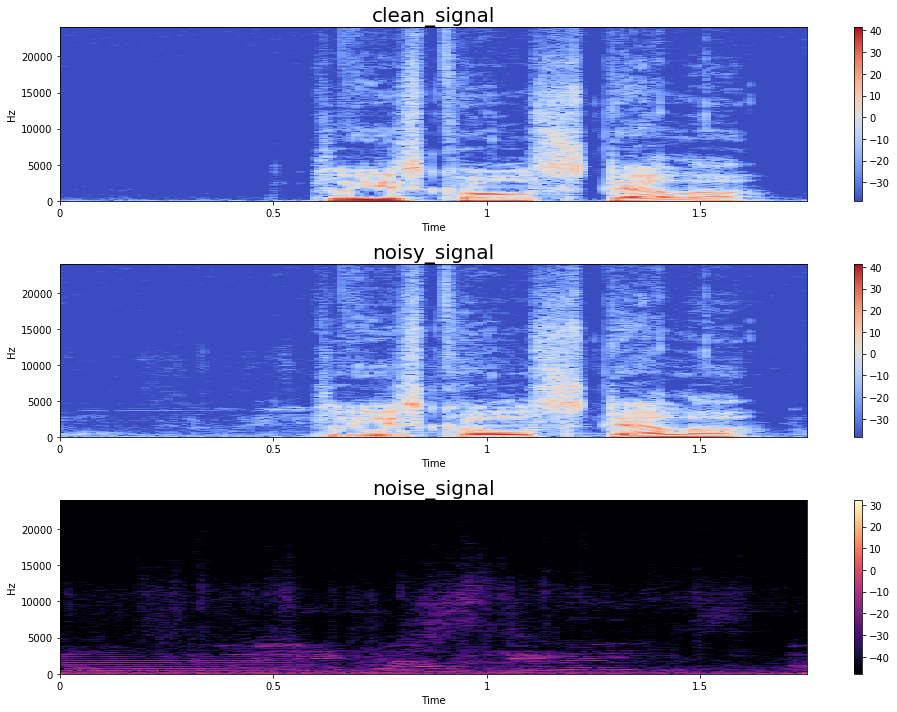

In [10]:
X_clean = librosa.stft(x_clean)
X_clean_db = librosa.amplitude_to_db(abs(X_clean))

X_noisy = librosa.stft(x_noisy)
X_noisy_db = librosa.amplitude_to_db(abs(X_noisy))

X_noise = librosa.stft(x_noise)
X_noise_db = librosa.amplitude_to_db(abs(X_noise))

# X_compute = librosa.stft(x_compute)
# X_compute_db = librosa.amplitude_to_db(abs(X_compute))


plt.figure(figsize=(14,10))

plt.subplot(3,1,1)
librosa.display.specshow(X_clean_db, sr=sr_clean, x_axis='time', y_axis='hz')
plt.title('clean_signal', fontsize=20)
plt.colorbar()

plt.subplot(3,1,2)
librosa.display.specshow(X_noisy_db, sr=sr_noisy, x_axis='time', y_axis='hz')
plt.title('noisy_signal', fontsize=20)
plt.colorbar()

plt.subplot(3,1,3)
librosa.display.specshow(X_noise_db, sr=sr_noisy, x_axis='time', y_axis='hz')
plt.title('noise_signal', fontsize=20)
plt.colorbar()

# plt.subplot(4,1,4)
# librosa.display.specshow(X_noise_db, sr=sr_noisy, x_axis='time', y_axis='hz')
# plt.title('computed_clean_signal', fontsize=20)
# plt.colorbar()

plt.tight_layout()

#plt.savefig('spectrograms.png');

# Import all Data

In [11]:
def grab_data(path):
    data = []
    for filename in glob.glob(os.path.join(path, '*.wav')):
        x, sr = librosa.load(filename, sr=48000)
        data.append(x)
    return data

In [12]:
clean_data = grab_data('clean_testset_wav')
noisy_data = grab_data('noisy_testset_wav')

# Zero-Crossing-Rate

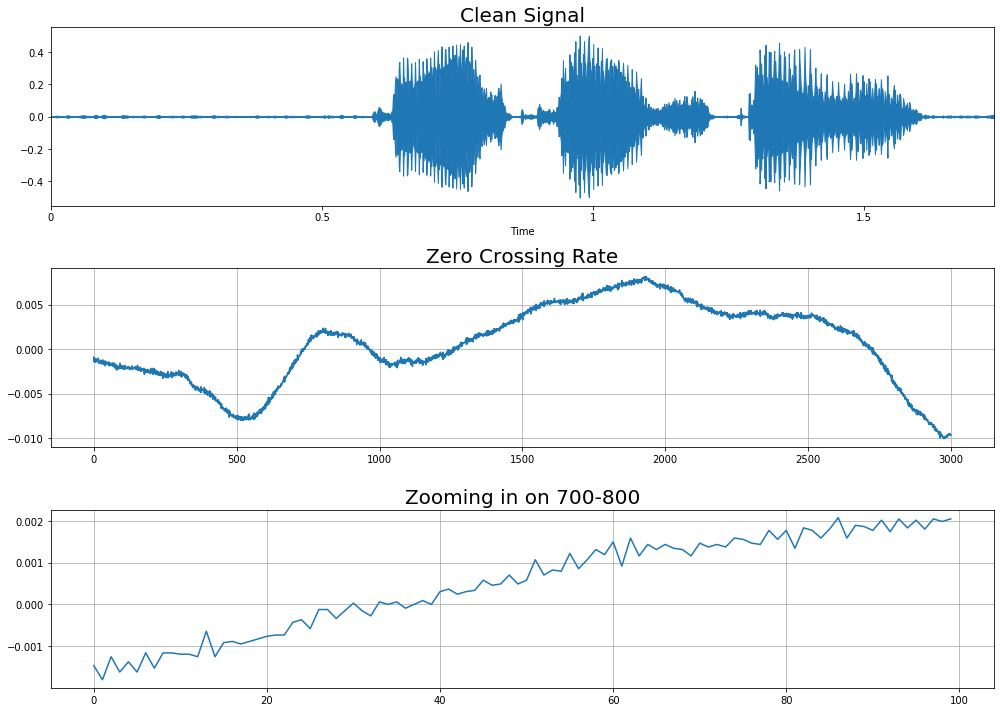

In [66]:
n0 = 1000
n1 = 4000

plt.figure(figsize=(14,10))

plt.subplot(3,1,1)
librosa.display.waveplot(x_clean, sr_clean)
plt.title('Clean Signal', fontsize=20)

plt.subplot(3,1,2)
plt.plot(x_clean[n0:n1])
plt.title('Zero Crossing Rate', fontsize=20)
plt.grid()

plt.subplot(3,1,3)
plt.plot(x_clean[1700:1800])
plt.title('Zooming in on 700-800', fontsize=20)
plt.grid()

plt.tight_layout();

# plt.savefig('zrc.png');

In [23]:
zero_crossings = librosa.zero_crossings(x_clean[n0:n1], pad=False)
print(sum(zero_crossings))

30


# Spectral Centroid

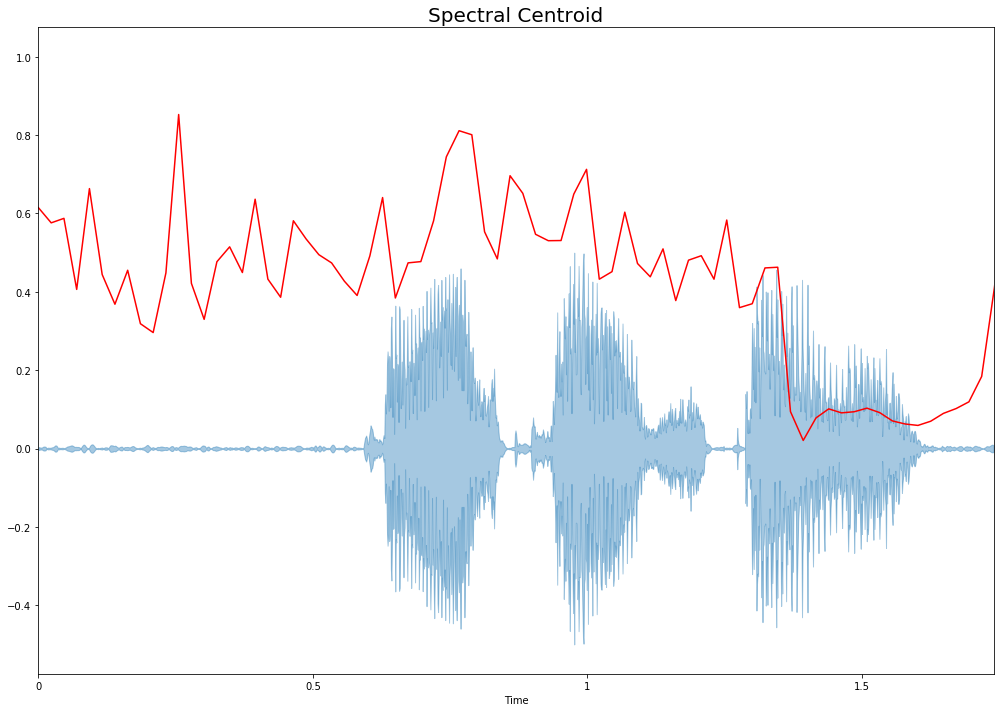

In [67]:
spectral_centroids = librosa.feature.spectral_centroid(x_clean, sr=sr_clean)[0]
spectral_centroids.shape

# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
plt.figure(figsize=(14,10))

librosa.display.waveplot(x_clean, sr=sr_clean, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')
plt.title('Spectral Centroid', fontsize=20)

plt.tight_layout();

# plt.savefig('spectral_centroid.png');

# Spectral Rolloff

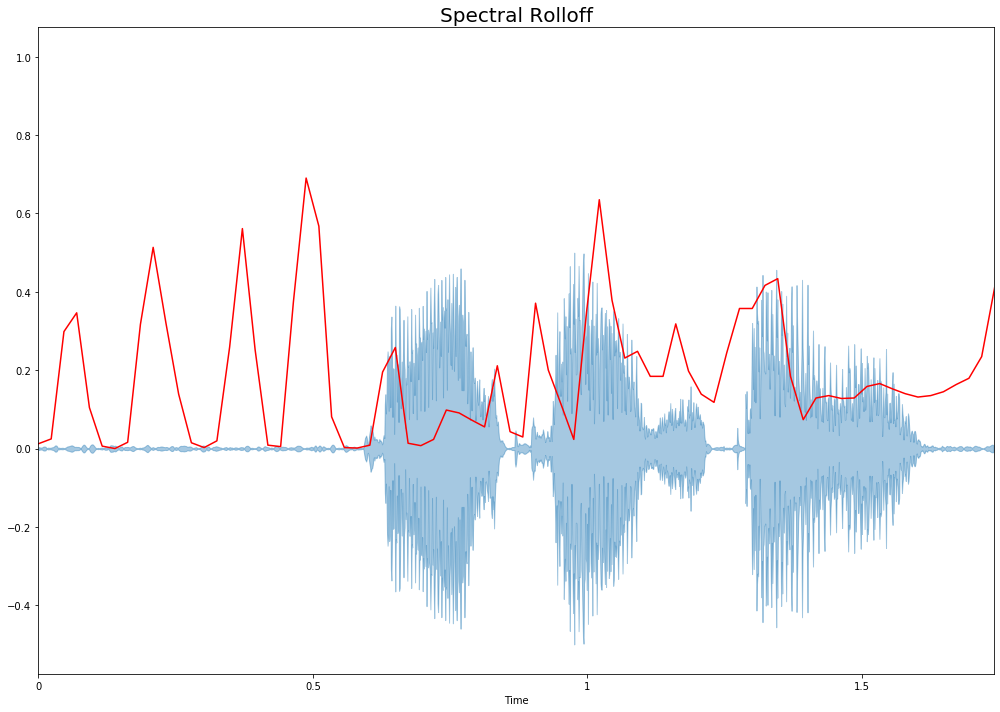

In [68]:
spectral_rolloff = librosa.feature.spectral_rolloff(x_clean+0.01, sr=sr_clean)[0]

plt.figure(figsize=(14,10))

librosa.display.waveplot(x_clean, sr=sr_clean, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.title('Spectral Rolloff', fontsize=20)

plt.tight_layout();

# plt.savefig('spectral_rolloff.png');

# Mel-frequency Cepstral Coefficients

/Users/appy/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/appy/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:189: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


(20, 164)
[ 1.38108325e-08  1.52646038e-08  3.63442965e-09 -3.63442942e-10
  1.29022251e-08  3.12560928e-08 -3.63442965e-09 -2.09888302e-08
 -3.63442965e-09  1.16301742e-08  9.81296022e-09 -3.81615095e-09
 -1.21753390e-08  1.25387816e-08  2.02619450e-08  1.74452612e-08
 -1.12667315e-08  2.36237918e-09 -1.12667315e-08 -2.39872353e-08]
[1.0000005  1.0000001  0.9999999  0.9999999  0.9999995  0.9999998
 1.0000007  1.0000001  0.99999946 1.0000001  1.0000002  0.9999997
 1.         0.99999964 0.9999998  0.9999999  0.9999997  1.
 1.0000002  0.9999999 ]


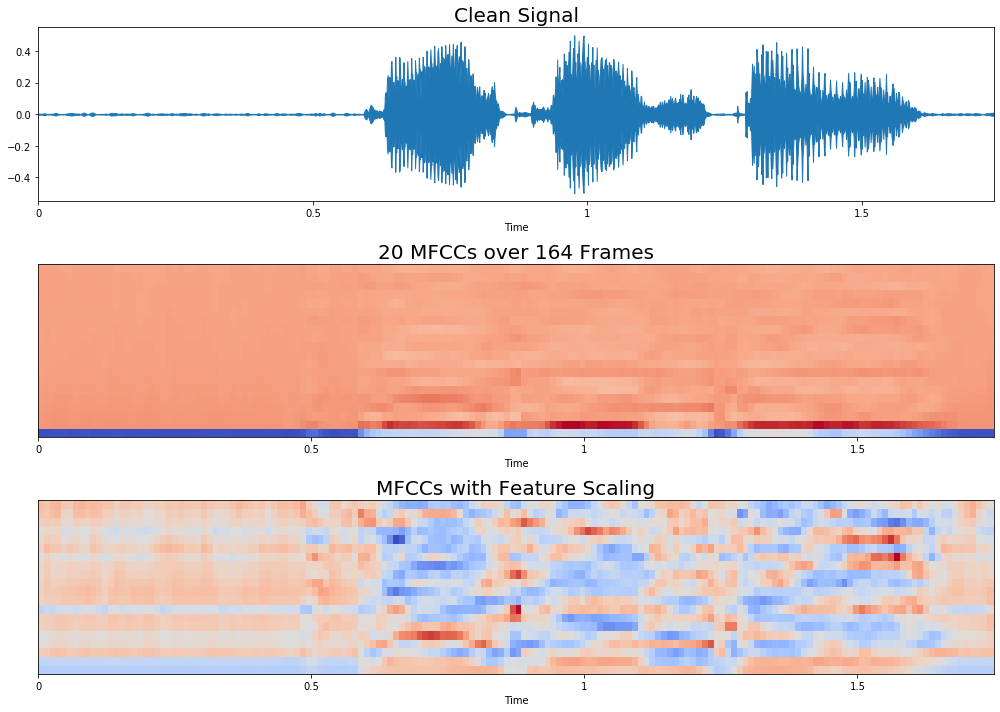

In [69]:
mfccs = librosa.feature.mfcc(x_clean, sr=sr_clean)
mfccs_sk = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.shape)
print(mfccs_sk.mean(axis=1))
print(mfccs_sk.var(axis=1))


#Displaying  the MFCCs:

plt.figure(figsize=(14,10))

plt.subplot(3,1,1)
librosa.display.waveplot(x_clean, sr_clean)
plt.title('Clean Signal', fontsize=20)

plt.subplot(3,1,2)
librosa.display.specshow(mfccs, sr=sr_clean, x_axis='time')
plt.title('20 MFCCs over 164 Frames', fontsize=20)

plt.subplot(3,1,3)
librosa.display.specshow(mfccs_sk, sr=sr_clean, x_axis='time')
plt.title('MFCCs with Feature Scaling', fontsize=20)

plt.tight_layout();

# plt.savefig('mfcc.png');

# Chroma Frequencies

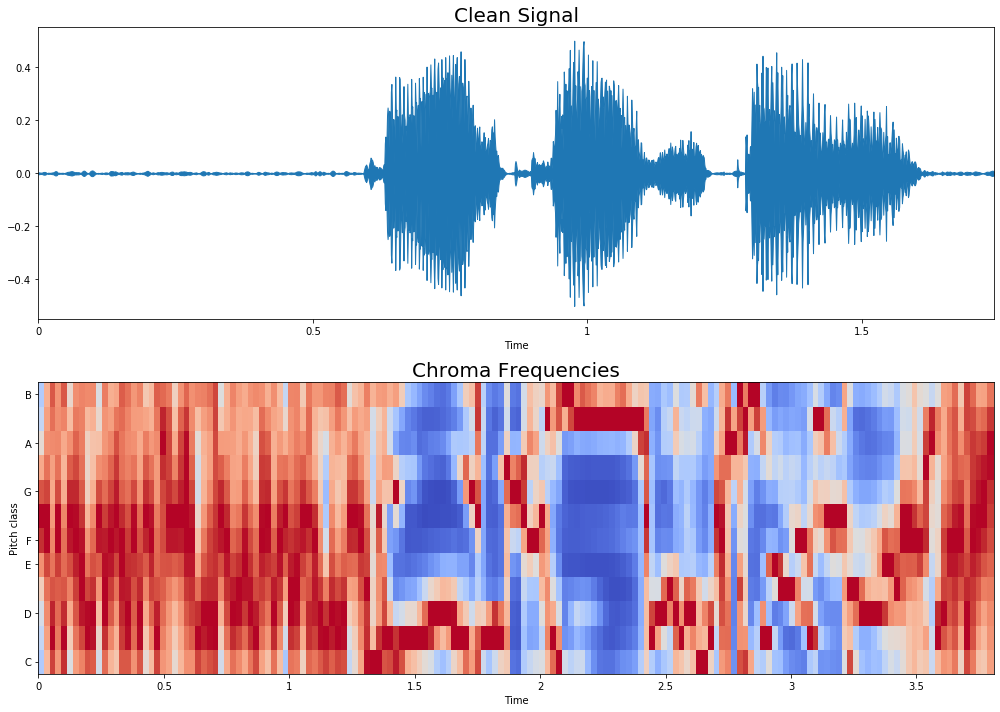

In [70]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(x_clean, sr=sr_clean, hop_length=hop_length)

plt.figure(figsize=(14, 10))

plt.subplot(2,1,1)
librosa.display.waveplot(x_clean, sr_clean)
plt.title('Clean Signal', fontsize=20)

plt.subplot(2,1,2)
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.title('Chroma Frequencies', fontsize=20)

plt.tight_layout();

# plt.savefig('chroma_frequencies.png');